## Churn classification

In [2]:
import pandas as pd
import numpy as np
import scipy as sp

In [3]:
data = pd.read_csv('data/telecom_churn.csv')

### Scikit baseline model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

In [5]:
# name list
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost"
]

# list of classifiers
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(),
]

In [6]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

def predictor_train(X, y,name,alg):
    """_summary_

    Args:
        X (_type_): _description_
        y (_type_): _description_
        name (_type_): _description_
        alg (_type_): _description_

    Returns:
        _type_: _description_
    """
    ct = ColumnTransformer([
    ('binary data', OneHotEncoder(), [1,2]),
    ('standard', StandardScaler(), [0,3,4,5,6,7,8,9])],
    remainder = 'passthrough')

    pipe = Pipeline(steps=[('columntrans', ct),(name, alg)])
    pipe.fit(X, y)
    return pipe


def tsne_train(X, y,name,alg):
    """_summary_

    Args:
        x_test (_type_): _description_
        y (_type_): _description_
        name (_type_): _description_
        alg (_type_): _description_

    Returns:
        _type_: _description_
    """
    ct = ColumnTransformer([
    ('standard', StandardScaler(), [0,1])],
    remainder = 'passthrough')

    pipe = Pipeline(steps=[('columntrans', ct),(name, alg)])
    pipe.fit(X, y)
    return pipe


def score(X,y,name,alg):
    """_summary_

    Args:
        X (arraylike): dataset predictor variables
        y (arraylike): dataset label
        name (alghorithm name): name of the alghorithm
        alg (alghorithm object): trained alghorithm object

    Returns:
        DataFrame: dataframe with the alghorithm name, f1 score, precision score and recall score
    """
    scores =[]
    scores = [name , alg.score(X,y), recall_score(y,alg.predict(X)), precision_score(y,alg.predict(X)), f1_score(y,alg.predict(X)), roc_auc_score(y,alg.predict(X)), ]
    return scores


def predict(X, y, name, alg):
    """_summary_

    Args:
        X (_type_): _description_
        y (_type_): _description_
        name (_type_): _description_
        alg (_type_): _description_

    Returns:
        _type_: _description_
    """
    predictions = alg.predict(X)
    return [name, predictions]

In [7]:
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:].values, data.Churn, test_size=0.2, random_state=42)

In [9]:
x_train.shape , x_test.shape

((2666, 10), (667, 10))

In [10]:
y_train.shape , y_test.shape

((2666,), (667,))

In [11]:
trained_alg = []
scores = pd.DataFrame()
predictions = []

In [12]:
for name, clf in zip(names, classifiers):
    trained_alg.append([name, predictor_train(x_train, y_train, name , clf)])

e:\anaconda\envs\data_science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\anaconda\envs\data_science\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [13]:
trained_alg

[['Nearest Neighbors',
  Pipeline(steps=[('columntrans',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('binary data',
                                                    OneHotEncoder(), [1, 2]),
                                                   ('standard', StandardScaler(),
                                                    [0, 3, 4, 5, 6, 7, 8, 9])])),
                  ('Nearest Neighbors', KNeighborsClassifier())])],
 ['Linear SVM',
  Pipeline(steps=[('columntrans',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('binary data',
                                                    OneHotEncoder(), [1, 2]),
                                                   ('standard', StandardScaler(),
                                                    [0, 3, 4, 5, 6, 7, 8, 9])])),
                  ('Linear SVM', SVC())])],
 ['RBF SVM',
  Pipeline(steps=[('column

In [14]:
for name, clf in trained_alg:
    metrics = score(x_test, y_test, name, clf)
    scores = scores.append([metrics])

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_5908\1826369934.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([metrics])
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_5908\1826369934.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([metrics])
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_5908\1826369934.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([metrics])
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_5908\1826369934.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append([metrics])
C:\Users\Krzysztof\AppData\Local\Temp\ipyker

In [16]:
scores.columns = ['name', 'accuracy', 'recall', 'precision', 'f1', 'roc_auc']
scores[:]

,name,accuracy,recall,precision,f1,roc_auc
0,Nearest Neighbors,0.904048,0.396040,0.930233,0.555556,0.695370
0,Linear SVM,0.920540,0.495050,0.961538,0.653595,0.745758
0,RBF SVM,0.920540,0.495050,0.961538,0.653595,0.745758
0,Gaussian Process,0.911544,0.435644,0.956522,0.598639,0.716055
0,Decision Tree,0.875562,0.574257,0.591837,0.582915,0.751793
0,Random Forest,0.929535,0.623762,0.875000,0.728324,0.803931
0,Neural Net,0.935532,0.663366,0.881579,0.757062,0.823733
0,AdaBoost,0.896552,0.465347,0.758065,0.576687,0.719422
0,Naive Bayes,0.836582,0.326733,0.445946,0.377143,0.627147
0,QDA,0.746627,0.851485,0.358333,0.504399,0.789700


In [17]:
for name, clf in trained_alg:
    predictions.append([name, predict(x_test, y_test, name, clf)])

In [18]:
predictions[:1]

[['Nearest Neighbors',
  ['Nearest Neighbors',
   array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
          0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
          0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0

### Visualize the baseline model

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

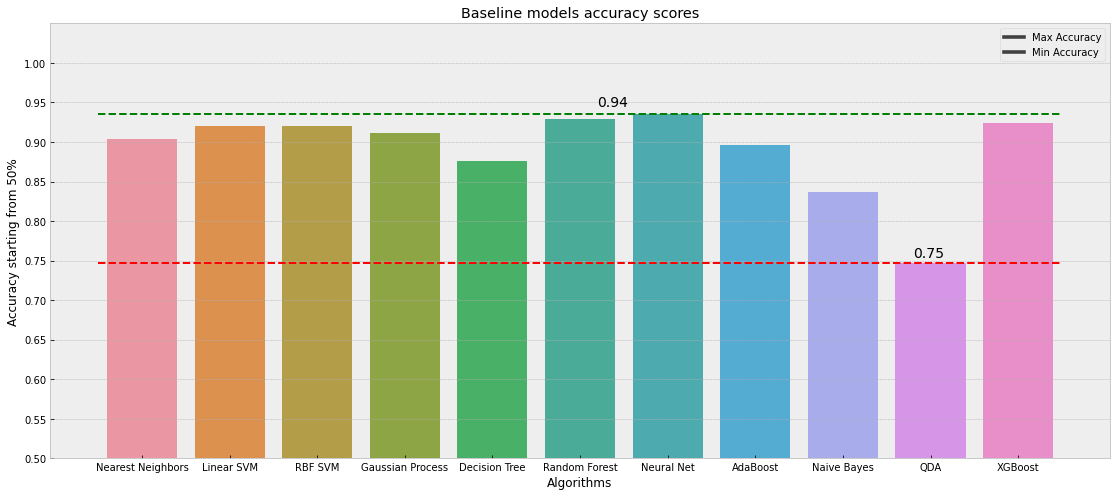

In [30]:
plt.figure(figsize=(19,8))
sns.barplot(data = scores, x='name', y='accuracy')
plt.ylim(0.5, 1.05)
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.ylabel('Accuracy starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(scores['accuracy']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(5.2, 0.95, round(np.max(scores['accuracy']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(scores['accuracy']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(8.8, 0.76, round(np.min(scores['accuracy']),2), ha='left', va='center', fontsize = 14)
plt.legend(['Max Accuracy', 'Min Accuracy'])
plt.title('Baseline models accuracy scores');

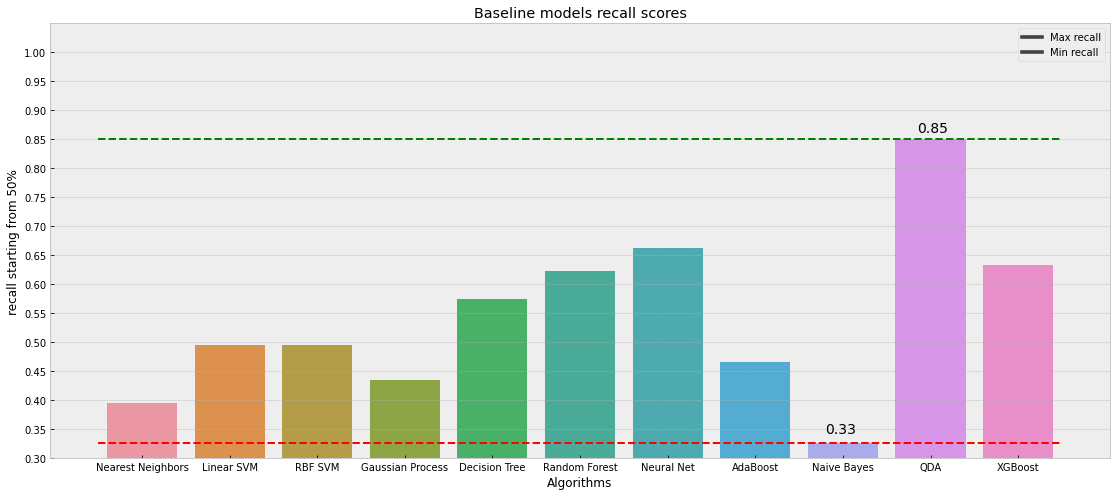

In [29]:
plt.figure(figsize=(19,8))
sns.barplot(data = scores, x='name', y='recall')
plt.ylim(0.3, 1.05)
plt.yticks(np.arange(0.3, 1.05, 0.05))
plt.ylabel('recall starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(scores['recall']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(8.85, 0.87, round(np.max(scores['recall']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(scores['recall']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(7.8, 0.35, round(np.min(scores['recall']),2), ha='left', va='center', fontsize = 14)
plt.legend(['Max recall', 'Min recall'])
plt.title('Baseline models recall scores');

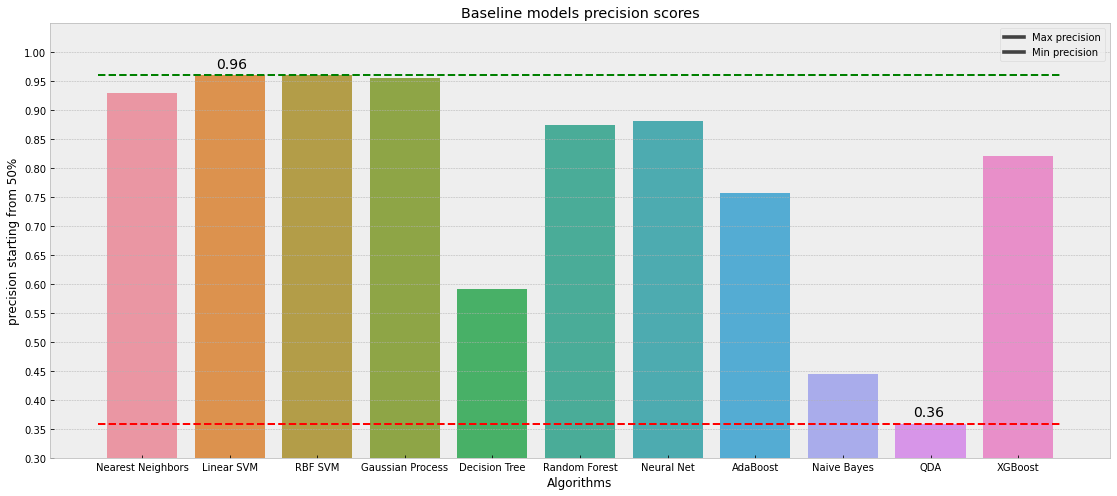

In [31]:
plt.figure(figsize=(19,8))
sns.barplot(data = scores, x='name', y='precision')
plt.ylim(0.3, 1.05)
plt.yticks(np.arange(0.3, 1.05, 0.05))
plt.ylabel('precision starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(scores['precision']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(.85, 0.98, round(np.max(scores['precision']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(scores['precision']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(8.8, 0.38, round(np.min(scores['precision']),2), ha='left', va='center', fontsize = 14)
plt.legend(['Max precision', 'Min precision'])
plt.title('Baseline models precision scores');

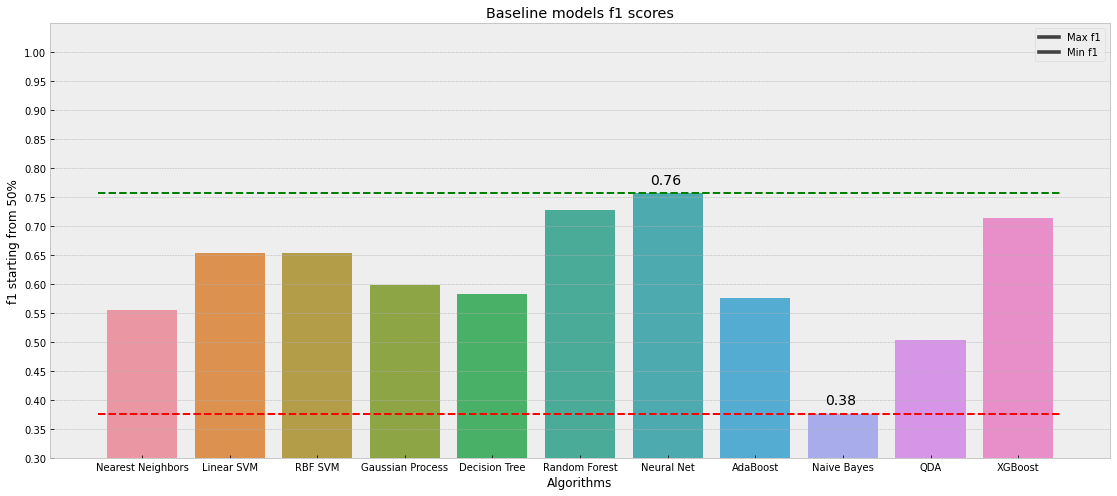

In [28]:
plt.figure(figsize=(19,8))
sns.barplot(data = scores, x='name', y='f1')
plt.ylim(0.3, 1.05)
plt.yticks(np.arange(0.3, 1.05, 0.05))
plt.ylabel('f1 starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(scores['f1']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(5.8, 0.78, round(np.max(scores['f1']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(scores['f1']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(7.8, 0.4, round(np.min(scores['f1']),2), ha='left', va='center', fontsize = 14)
plt.legend(['Max f1', 'Min f1'])
plt.title('Baseline models f1 scores');

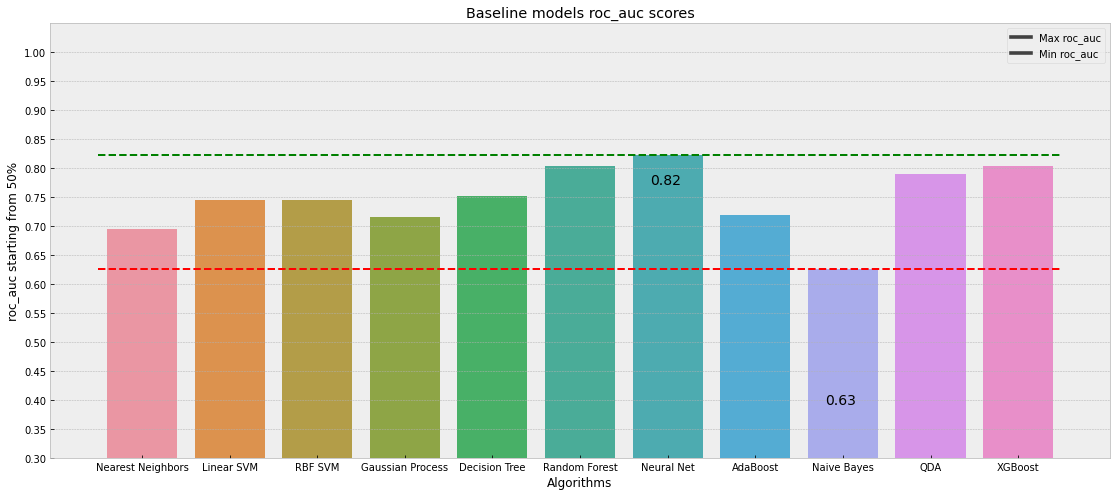

In [50]:
plt.figure(figsize=(19,8))
sns.barplot(data = scores, x='name', y='roc_auc')
plt.ylim(0.5, 1.05)
plt.yticks(np.arange(0.3, 1.05, 0.05))
plt.ylabel('roc_auc starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(scores['roc_auc']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(5.8, 0.78, round(np.max(scores['roc_auc']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(scores['roc_auc']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(7.8, 0.4, round(np.min(scores['roc_auc']),2), ha='left', va='center', fontsize = 14)
plt.legend(['Max roc_auc', 'Min roc_auc'])
plt.title('Baseline models roc_auc scores');

### Baseline models with t-sne 

In [32]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [33]:
X_Train_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(x_train)
X_Train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_Train_reduced)

e:\anaconda\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\anaconda\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2666 samples in 0.005s...
[t-SNE] Computed neighbors for 2666 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2666
[t-SNE] Computed conditional probabilities for sample 2000 / 2666
[t-SNE] Computed conditional probabilities for sample 2666 / 2666
[t-SNE] Mean sigma: 12.975293
[t-SNE] Computed conditional probabilities in 0.151s
[t-SNE] Iteration 50: error = 77.9574738, gradient norm = 0.0595695 (50 iterations in 0.794s)
[t-SNE] Iteration 100: error = 70.3514862, gradient norm = 0.0005351 (50 iterations in 0.763s)
[t-SNE] Iteration 150: error = 70.3333969, gradient norm = 0.0002580 (50 iterations in 0.718s)
[t-SNE] Iteration 200: error = 70.3332901, gradient norm = 0.0001115 (50 iterations in 0.752s)
[t-SNE] Iteration 250: error = 70.3332672, gradient norm = 0.0001210 (50 iterations in 0.690s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.333267
[t-SNE] Iteration 300: er

In [34]:
X_Test_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(x_test)
X_Test_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_Test_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 667 samples in 0.003s...
[t-SNE] Computed neighbors for 667 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 667 / 667
[t-SNE] Mean sigma: 20.618588
[t-SNE] Computed conditional probabilities in 0.066s


e:\anaconda\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\anaconda\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 50: error = 61.4926300, gradient norm = 0.4198660 (50 iterations in 0.234s)
[t-SNE] Iteration 100: error = 60.6993866, gradient norm = 0.4171913 (50 iterations in 0.253s)
[t-SNE] Iteration 150: error = 60.6974907, gradient norm = 0.4211897 (50 iterations in 0.255s)
[t-SNE] Iteration 200: error = 60.6323509, gradient norm = 0.4203701 (50 iterations in 0.426s)
[t-SNE] Iteration 250: error = 60.9252052, gradient norm = 0.4122375 (50 iterations in 0.262s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.925205
[t-SNE] Iteration 300: error = 0.7326161, gradient norm = 0.0007244 (50 iterations in 0.178s)
[t-SNE] Iteration 350: error = 0.7060129, gradient norm = 0.0001998 (50 iterations in 0.207s)
[t-SNE] Iteration 400: error = 0.7022424, gradient norm = 0.0001081 (50 iterations in 0.235s)
[t-SNE] Iteration 450: error = 0.7011570, gradient norm = 0.0000717 (50 iterations in 0.169s)
[t-SNE] Iteration 500: error = 0.7003704, gradient norm = 0.0000631 (50 

In [35]:
data_xtrain_embd= pd.DataFrame(X_Train_embedded)
data_xtest_embd= pd.DataFrame(X_Test_embedded)
data_xtrain_embd.head() , data_xtrain_embd.shape , data_xtest_embd.shape

(           0          1
 0 -46.705692   0.742481
 1 -31.020857 -22.180758
 2  19.924273   8.360500
 3 -38.430882  -7.452418
 4  22.590147  10.603283,
 (2666, 2),
 (667, 2))

<AxesSubplot:xlabel='0', ylabel='1'>

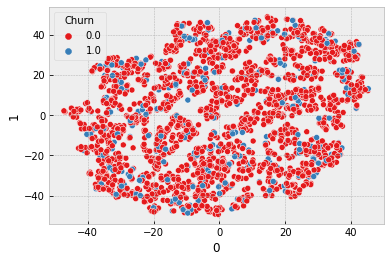

In [36]:
tsne_vis = pd.concat([data_xtrain_embd, y_train], axis=1)

sns.scatterplot(x=tsne_vis.iloc[:,0],y=tsne_vis.iloc[:,1], hue=tsne_vis.Churn, palette='Set1')

<AxesSubplot:xlabel='0', ylabel='1'>

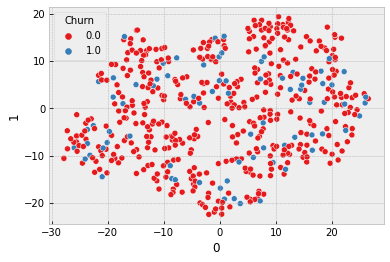

In [37]:
tsne_vis_test = pd.concat([data_xtest_embd, y_train], axis=1)
sns.scatterplot(x=tsne_vis_test.iloc[:,0],y=tsne_vis_test.iloc[:,1], hue=tsne_vis_test.Churn, palette='Set1')

In [38]:
# name list
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBClassifier",
]

# list of classifiers
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier()
]

In [39]:
tsne_trained_alg = []
tsne_scores = pd.DataFrame()
tsne_predictions = []

for name, clf in zip(names, classifiers):
    tsne_trained_alg.append([name, tsne_train(data_xtrain_embd, y_train, name , clf)])

for name, clf in tsne_trained_alg:
    tsne_metrics = score(data_xtest_embd, y_test, name, clf)
    tsne_scores = tsne_scores.append([tsne_metrics])

for name, clf in tsne_trained_alg:
    tsne_predictions.append([name, predict(data_xtest_embd, y_test, name, clf)])

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_5908\1652390399.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tsne_scores = tsne_scores.append([tsne_metrics])
e:\anaconda\envs\data_science\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_5908\1652390399.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tsne_scores = tsne_scores.append([tsne_metrics])
e:\anaconda\envs\data_science\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use

In [41]:
tsne_scores.columns = ['name', 'accuracy', 'recall', 'precision', 'f1','roc_auc_score']
tsne_scores.sort_values(by='accuracy', ascending=False)

,name,accuracy,recall,precision,f1,roc_auc_score
0,Linear SVM,0.848576,0.000000,0.000000,0.000000,0.500000
0,RBF SVM,0.848576,0.000000,0.000000,0.000000,0.500000
0,Gaussian Process,0.848576,0.000000,0.000000,0.000000,0.500000
0,Neural Net,0.848576,0.000000,0.000000,0.000000,0.500000
0,AdaBoost,0.848576,0.000000,0.000000,0.000000,0.500000
0,Naive Bayes,0.848576,0.000000,0.000000,0.000000,0.500000
0,QDA,0.848576,0.000000,0.000000,0.000000,0.500000
0,XGBClassifier,0.845577,0.009901,0.250000,0.019048,0.502300
0,Random Forest,0.844078,0.009901,0.200000,0.018868,0.501417
0,Nearest Neighbors,0.838081,0.019802,0.181818,0.035714,0.501950


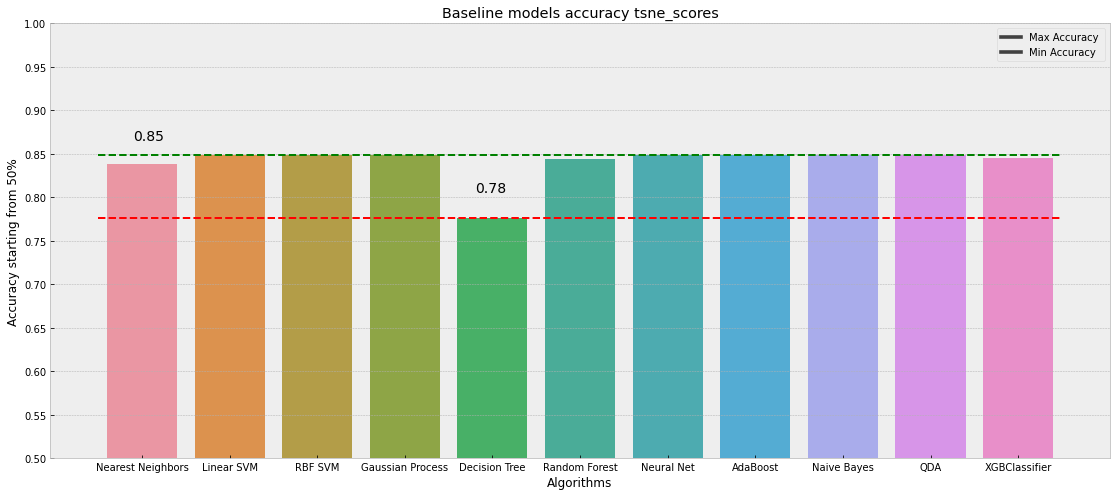

In [42]:
plt.figure(figsize=(19,8))
sns.barplot(data = tsne_scores,x='name', y='accuracy')
plt.ylim(0.5, 1.0)
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.ylabel('Accuracy starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(tsne_scores['accuracy']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(-0.1, 0.87, round(np.max(tsne_scores['accuracy']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(tsne_scores['accuracy']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
plt.text(3.8, 0.81, round(np.min(tsne_scores['accuracy']),2), ha='left', va='center', fontsize = 14)
plt.legend([f'Max Accuracy ', 'Min Accuracy'])
plt.title('Baseline models accuracy tsne_scores');

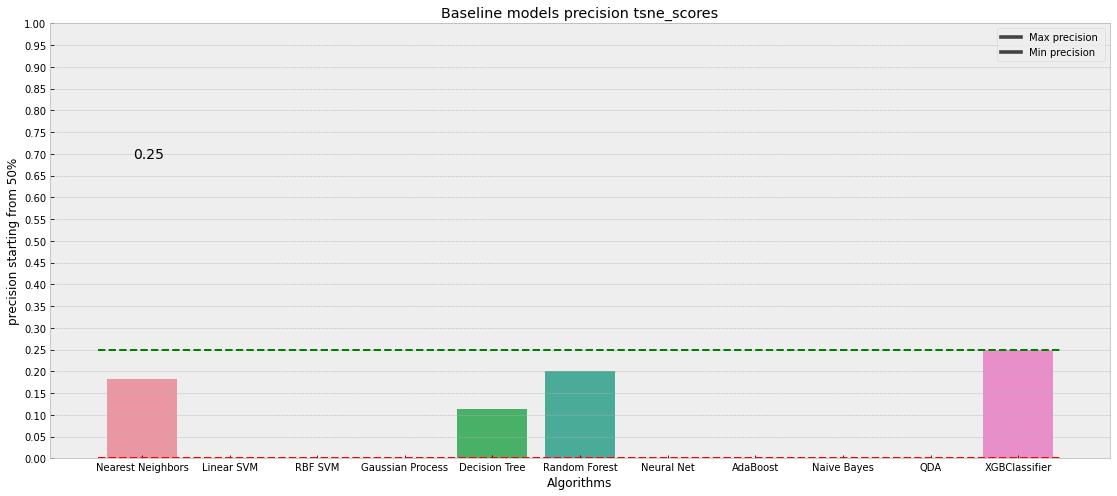

In [44]:
plt.figure(figsize=(19,8))
sns.barplot(data = tsne_scores,x='name', y='precision')
plt.ylim(0.0, 1.0)
plt.yticks(np.arange(0., 1.05, 0.05))
plt.ylabel('precision starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(tsne_scores['precision']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(-0.1, 0.7, round(np.max(tsne_scores['precision']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(tsne_scores['precision']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
#plt.text(2.8, 0.1, round(np.min(tsne_scores['precision']),2), ha='left', va='center', fontsize = 14)
plt.legend([f'Max precision ', 'Min precision'])
plt.title('Baseline models precision tsne_scores');

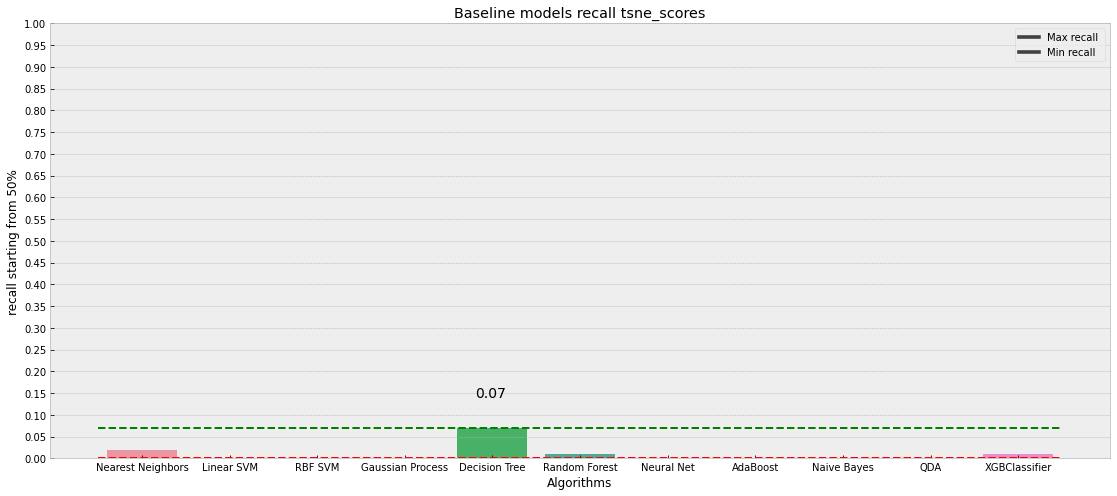

In [45]:
plt.figure(figsize=(19,8))
sns.barplot(data = tsne_scores,x='name', y='recall')
plt.ylim(0.0, 1.0)
plt.yticks(np.arange(0., 1.05, 0.05))
plt.ylabel('recall starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(tsne_scores['recall']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(3.8, 0.15, round(np.max(tsne_scores['recall']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(tsne_scores['recall']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
#plt.text(2.8, 0.1, round(np.min(tsne_scores['precision']),2), ha='left', va='center', fontsize = 14)
plt.legend([f'Max recall ', 'Min recall'])
plt.title('Baseline models recall tsne_scores');

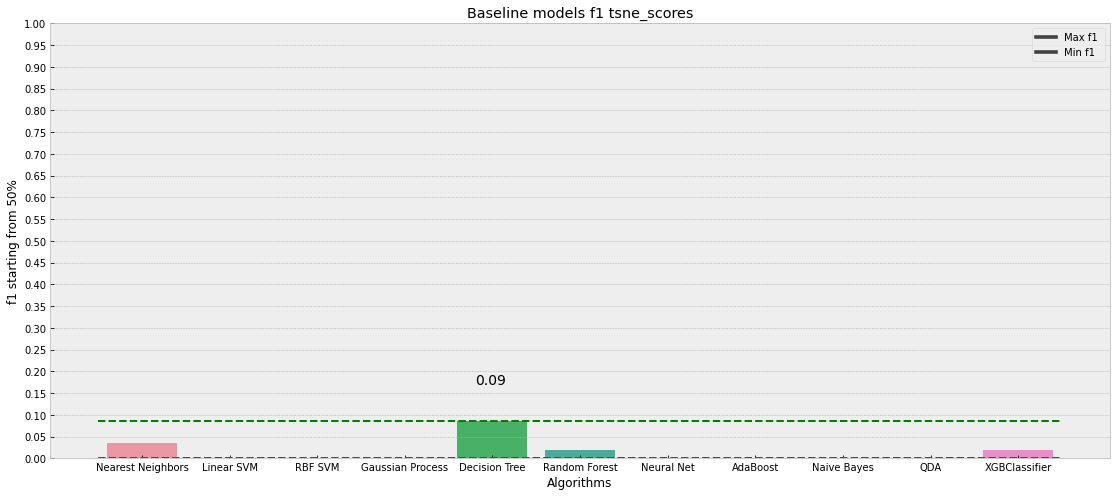

In [46]:
plt.figure(figsize=(19,8))
sns.barplot(data = tsne_scores,x='name', y='f1')
plt.ylim(0.0, 1.0)
plt.yticks(np.arange(0., 1.05, 0.05))
plt.ylabel('f1 starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(tsne_scores['f1']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(3.8, 0.18, round(np.max(tsne_scores['f1']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(tsne_scores['f1']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
#plt.text(2.8, 0.1, round(np.min(tsne_scores['precision']),2), ha='left', va='center', fontsize = 14)
plt.legend([f'Max f1 ', 'Min f1'])
plt.title('Baseline models f1 tsne_scores');

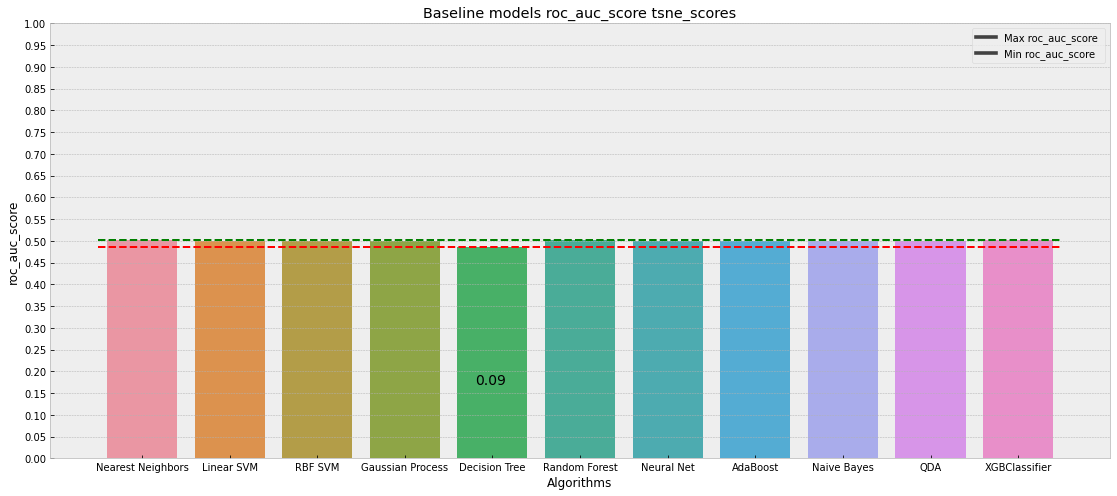

In [48]:
plt.figure(figsize=(19,8))
sns.barplot(data = tsne_scores,x='name', y='roc_auc_score')
plt.ylim(0.0, 1.0)
plt.yticks(np.arange(0., 1.05, 0.05))
plt.ylabel('roc_auc_score')
plt.xlabel('Algorithms')
plt.hlines(y=np.max(tsne_scores['roc_auc_score']), xmin=-0.5, xmax=10.5, colors='g', linestyles='dashed')
plt.text(3.8, 0.18, round(np.max(tsne_scores['f1']),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min(tsne_scores['roc_auc_score']), xmin=-0.5, xmax=10.5, colors='r', linestyles='dashed')
#plt.text(2.8, 0.1, round(np.min(tsne_scores['precision']),2), ha='left', va='center', fontsize = 14)
plt.legend([f'Max roc_auc_score ', 'Min roc_auc_score'])
plt.title('Baseline models roc_auc_score tsne_scores');

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix

In [ ]:
from sklearn.metrics import RocCurveDisplay
def RocCurveEstimators(X_test, y_test,alg):
    for name , clf in alg:
        RocCurveDisplay.from_estimator(clf, data_xtest_embd, y_test, name = name)
    plt.show()

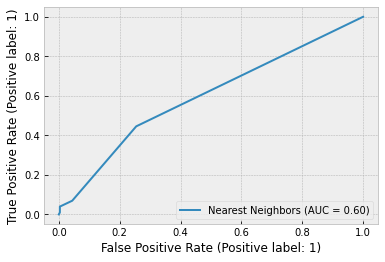

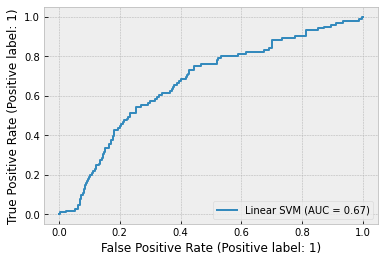

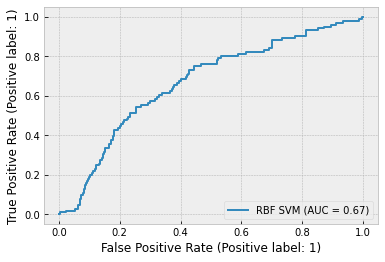

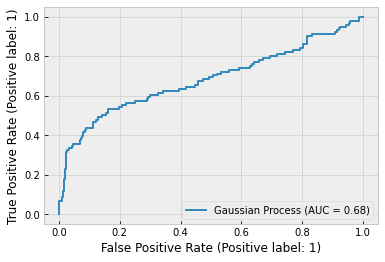

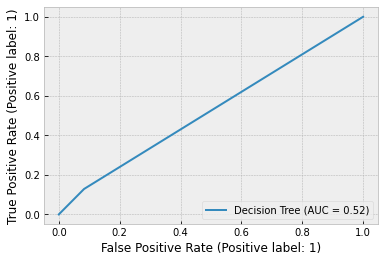

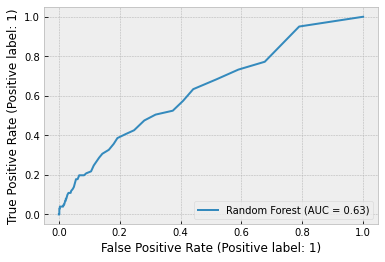

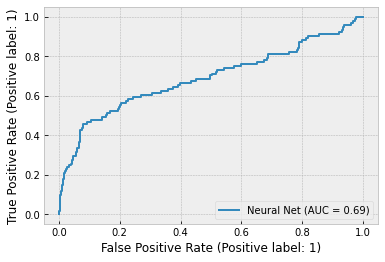

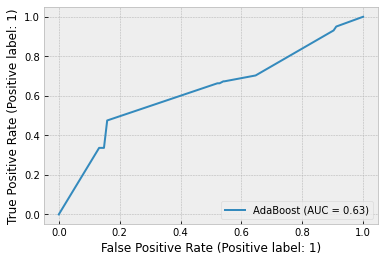

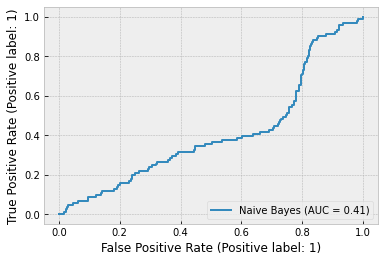

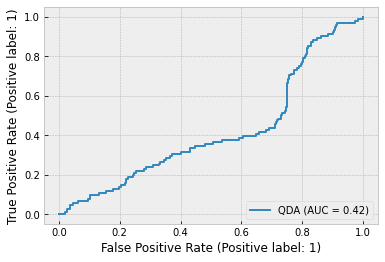

In [ ]:
RocCurveEstimators(data_xtest_embd, y_test,tsne_trained_alg)

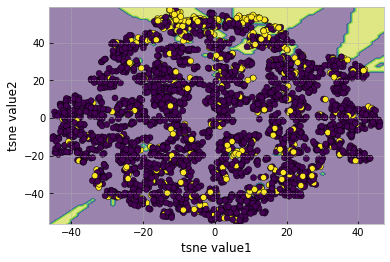

In [ ]:
# Decision boundries


disp = DecisionBoundaryDisplay.from_estimator(
     tsne_trained_alg[0][1], data_xtrain_embd, response_method="predict",
     xlabel='tsne value1', ylabel='tsne value2',
     alpha=0.5,
)
disp.ax_.scatter(data_xtrain_embd[0],data_xtrain_embd[1], c=y_train, edgecolor="k")

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
def DecisionBoundry(X_test, y_test,alg):
    for name , clf in alg:
        disp = DecisionBoundaryDisplay.from_estimator(
            clf, data_xtest_embd, response_method="predict",
            xlabel='tsne value1', ylabel='tsne value2',
            alpha=0.5)
        disp.ax_.scatter(data_xtest_embd[0], data_xtest_embd[1], c=y_test, edgecolor="k")
    plt.show()

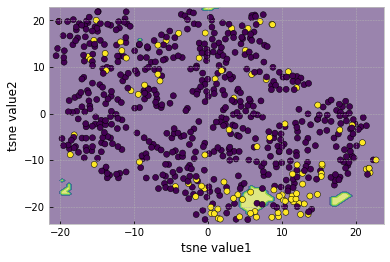

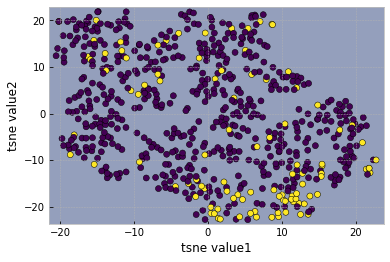

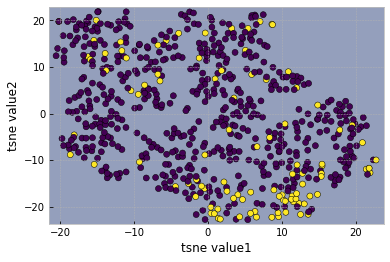

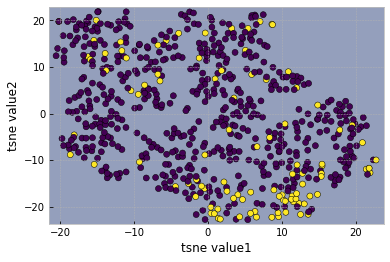

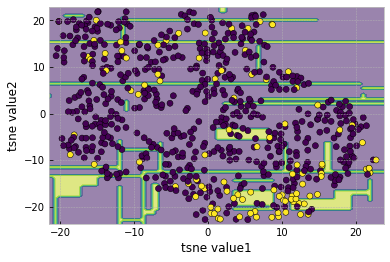

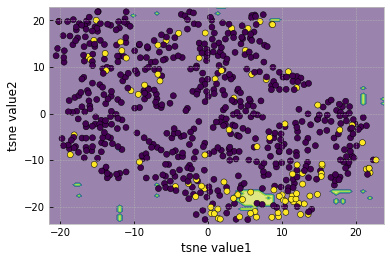

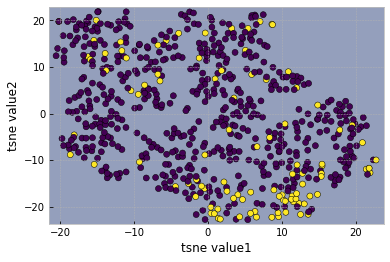

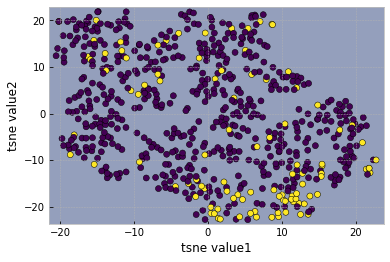

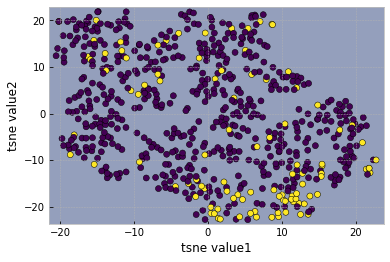

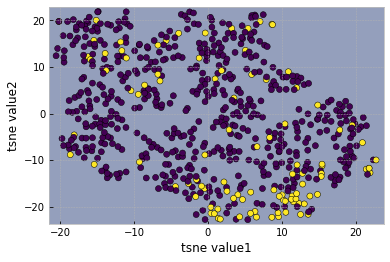

In [ ]:
DecisionBoundry(data_xtest_embd, y_test,tsne_trained_alg)